In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [20]:
movies_prep= pd.read_csv('movies_cleaned.csv')

In [22]:
movies_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9566 entries, 0 to 9565
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9566 non-null   int64  
 1   title              9566 non-null   object 
 2   adult              9566 non-null   bool   
 3   genres             9566 non-null   object 
 4   original_language  9566 non-null   object 
 5   popularity         9566 non-null   float64
 6   release_date       9566 non-null   object 
 7   runtime            9566 non-null   int64  
 8   vote_average       9566 non-null   float64
 9   vote_count         9566 non-null   int64  
 10  actors             9566 non-null   object 
 11  director           9566 non-null   object 
 12  keywords           9566 non-null   object 
 13  release_year       9566 non-null   int64  
 14  num_genres         9566 non-null   int64  
 15  main_genre         9566 non-null   object 
 16  num_actors         9566 

In [24]:
movies_prep.head()

,id,title,adult,genres,original_language,popularity,release_date,runtime,vote_average,vote_count,...,keywords,release_year,num_genres,main_genre,num_actors,main_actor,rounded_averages,log_vote_count,log_popularity,log_runtime
0,572802,Aquaman and the Lost Kingdom,False,"['Action', 'Adventure', 'Fantasy']",en,5841.384,2023-12-20,124,7.013,1156,...,"['superhero', 'secret society', 'half-brother'...",2023,3,Action,4,Jason Momoa,7.0,7.053586,8.672894,4.828314
1,787699,Wonka,False,"['Comedy', 'Family', 'Fantasy']",en,2333.391,2023-12-06,117,7.200,1660,...,"['chocolate', 'musical', 'prequel', 'duringcre...",2023,3,Comedy,4,Timothée Chalamet,7.2,7.415175,7.755506,4.770685
2,1022796,Wish,False,"['Animation', 'Family', 'Fantasy', 'Adventure']",en,1662.711,2023-11-13,95,6.638,538,...,"['friendship', 'musical', 'computer animation'...",2023,4,Animation,4,Ariana DeBose,6.6,6.289716,7.416806,4.564348
3,940551,Migration,False,"['Animation', 'Adventure', 'Comedy', 'Family',...",en,1486.310,2023-12-06,83,7.830,390,...,"['duck', 'migration', 'flight', 'anthropomorph...",2023,5,Animation,4,Kumail Nanjiani,7.8,5.968708,7.304724,4.430817
4,609681,The Marvels,False,"['Science Fiction', 'Adventure', 'Action']",en,1397.918,2023-11-08,105,6.415,1328,...,"['hero', 'superhero', 'space travel', 'based o...",2023,3,Science Fiction,4,Brie Larson,6.4,7.192182,7.243454,4.663439


In [26]:
#Dropping Irrelevant columns like 'id','title','release_date','keywords','rounded_averages' because we do not need them for modeling.
movies_prep = movies_prep.drop(columns=['id','title','release_date','keywords','rounded_averages','popularity','runtime','vote_count'], errors = 'ignore')
movies_prep.head(10)

,adult,genres,original_language,vote_average,actors,director,release_year,num_genres,main_genre,num_actors,main_actor,log_vote_count,log_popularity,log_runtime
0,False,"['Action', 'Adventure', 'Fantasy']",en,7.013,"['Jason Momoa', 'Patrick Wilson', 'Yahya Abdul...",James Wan,2023,3,Action,4,Jason Momoa,7.053586,8.672894,4.828314
1,False,"['Comedy', 'Family', 'Fantasy']",en,7.200,"['Timothée Chalamet', 'Calah Lane', 'Keegan-Mi...",Paul King,2023,3,Comedy,4,Timothée Chalamet,7.415175,7.755506,4.770685
2,False,"['Animation', 'Family', 'Fantasy', 'Adventure']",en,6.638,"['Ariana DeBose', 'Chris Pine', 'Alan Tudyk', ...",Chris Buck,2023,4,Animation,4,Ariana DeBose,6.289716,7.416806,4.564348
3,False,"['Animation', 'Adventure', 'Comedy', 'Family',...",en,7.830,"['Kumail Nanjiani', 'Elizabeth Banks', 'Caspar...",Benjamin Renner,2023,5,Animation,4,Kumail Nanjiani,5.968708,7.304724,4.430817
4,False,"['Science Fiction', 'Adventure', 'Action']",en,6.415,"['Brie Larson', 'Teyonah Parris', 'Iman Vellan...",Nia DaCosta,2023,3,Science Fiction,4,Brie Larson,7.192182,7.243454,4.663439
5,False,"['Action', 'Drama']",de,6.912,"['Emilio Sakraya', 'Dennis Mojen', 'Marie Mour...",Oliver Kienle,2024,2,Action,4,Emilio Sakraya,5.141664,6.936613,4.499810
6,False,"['Action', 'War']",ru,9.700,"['Daniyar Alshinov', 'Sanurzhan Suleymenov', '...",Serikbol Utepbergenov,2022,2,Action,4,Daniyar Alshinov,2.833213,6.723819,4.624973
7,False,['Drama'],en,8.626,"['Eugenio Derbez', 'Daniel Haddad', 'Jennifer ...",Christopher Zalla,2023,1,Drama,4,Eugenio Derbez,4.941642,6.653349,4.852030
8,False,"['Action', 'Science Fiction', 'Thriller']",hi,7.412,"['John Abraham', 'Serena Walia', 'Rakul Preet ...",Lakshya Raj Anand,2022,3,Action,4,John Abraham,4.454347,6.623325,4.820282
9,False,"['Action', 'Comedy', 'Crime', 'Drama']",en,6.499,"['Kevin Hart', 'Gugu Mbatha-Raw', 'Sam Worthin...",F. Gary Gray,2024,4,Action,4,Kevin Hart,6.424869,6.609301,4.672829


In [28]:
#Our target variable is 'vote_average' 
y= movies_prep['vote_average']
X= movies_prep[['log_vote_count', 'log_popularity', 'log_runtime','num_genres','num_actors',
                'release_year','original_language','main_genre','main_actor','director']]

In [30]:
#Convert categorical features using One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

In [32]:
#Scale all numeric features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
X_train, X_test, y_train,y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=42)

In [35]:
LiReg = LinearRegression()
LiReg.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = LiReg.predict(X_test)

print("R-squared Score:", r2_score(y_test,y_pred))
print("MAE:", mean_absolute_error(y_test,y_pred))
print("RMSE:", root_mean_squared_error(y_test,y_pred))


R-squared Score: -2.4987172745827066e+28
MAE: 79443220970675.4
RMSE: 141150607957072.5


In [38]:
#Importing decision tree, randomforest regressor, and gradientboosting regressor.
dt_model = DecisionTreeRegressor(random_state=42)


In [39]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [40]:
y_pred_dt = dt_model.predict(X_test)

In [41]:
print('Decision Tree Performance:')
print('R-squared :', r2_score(y_test, y_pred_dt))
print('MSE :', mean_absolute_error(y_test, y_pred_dt))
print('RMSE :', root_mean_squared_error(y_test,y_pred_dt))

Decision Tree Performance:
R-squared : 0.07507543641830894
MSE : 0.6319975609756098
RMSE : 0.8587709601639462


In [48]:
#Creating the random forest model, since decision tree is doing better than the linear regression model. It is still quite low.
rf_model = RandomForestRegressor(random_state=42)

In [50]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
y_pred_rf = rf_model.predict(X_test)

In [52]:
print('RandomForest Regressor Performance:')
print('R-squared :', r2_score(y_test, y_pred_rf))
print('MSE :', mean_absolute_error(y_test, y_pred_rf))
print('RMSE :', root_mean_squared_error(y_test,y_pred_rf))

RandomForest Regressor Performance:
R-squared : 0.40214003494048
MSE : 0.4940807177700348
RMSE : 0.6904367977622939


In [53]:
#Testing with Gradient Boosting Model before fine tuning it.
gb_model = GradientBoostingRegressor(random_state=42)

In [54]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [55]:
y_pred_gb = gb_model.predict(X_test)

In [56]:
print('GradientBoosting Regressor Performance:')
print('R-squared :', r2_score(y_test, y_pred_gb))
print('MSE :', mean_absolute_error(y_test, y_pred_gb))
print('RMSE :', root_mean_squared_error(y_test,y_pred_gb))

GradientBoosting Regressor Performance:
R-squared : 0.37735935496721695
MSE : 0.5162275811254056
RMSE : 0.7046004676769687


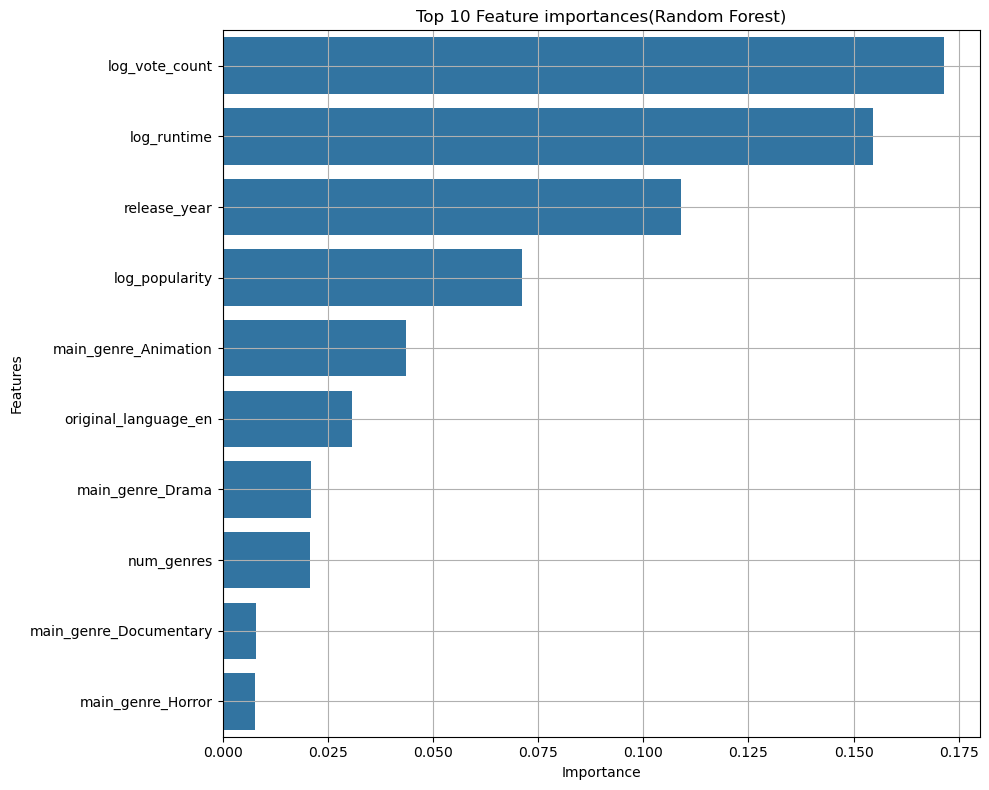

In [57]:
#RandomForest is the best performing model by far, now we will fine tune it
#First we plot feature importances

importances = rf_model.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index = features).sort_values(ascending = False)
plt.figure(figsize = (10,8))
sns.barplot(x=feat_importance[:10], y=feat_importance.index[:10])
plt.title('Top 10 Feature importances(Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.grid(True)
plt.show()

In [58]:
#Defining Param-grid
param_grid = {
                'n_estimators': [100,200],
                'max_depth' : [10,20,None],
                'min_samples_split': [2,5],
                'min_samples_leaf': [1,2],
                'max_features' : ['log2','sqrt']}
            
                           

In [59]:
#Setting up GridSearchCV for fine tuning
grid_search = GridSearchCV(estimator= RandomForestRegressor(random_state=42),param_grid=param_grid, scoring='r2', cv=10, n_jobs=-1, verbose =2)

In [60]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [61]:
y_pred_gscv = grid_search.predict(X_test)

In [62]:
print("R-squared:", r2_score(y_test, y_pred_gscv))
print("MAE:", mean_absolute_error(y_test, y_pred_gscv))
print("RMSE:", root_mean_squared_error(y_test, y_pred_gscv))

R-squared: 0.39941218772644327
MAE: 0.4993969860627176
RMSE: 0.6920101282617269


In [63]:
#Installed Xgboost using pip install, imported required packages like MinMaxScaler and XGBRegressor.
#Scaling data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
xgboost = XGBRegressor(random_state = 42)
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [65]:
y_pred_xgb = xgboost.predict(X_test) 

In [66]:
print("R-squared:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", root_mean_squared_error(y_test, y_pred_xgb))

R-squared: 0.4263730751610083
MAE: 0.48428198151937346
RMSE: 0.6762993304001611


In [88]:
#During EDA, we noticed that 'vote_count', 'popularity', and 'runtime' were highly skewed, and we log transformed them. However we will additionally remove outliers using the standard deviation method, not the top 5% method.
#Defining a function to trim each column in order to deal with outliers.

def trim_outliers_std(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    lower = mean - threshold * std
    upper = mean + threshold * std
    return df[(df[column] >= lower) & (df[column] <= upper)]

movies_trimmed = trim_outliers_std(movies_prep, 'log_vote_count')
movies_trimmed = trim_outliers_std(movies_trimmed, 'log_popularity')
movies_trimmed = trim_outliers_std(movies_trimmed, 'log_runtime')

In [94]:
(movies_trimmed.head(15))

,adult,genres,original_language,vote_average,actors,director,release_year,num_genres,main_genre,num_actors,main_actor,log_vote_count,log_popularity,log_runtime
161,False,['Horror'],en,6.000,"['Tuppence Middleton', 'Ralph Ineson', 'Matt S...",William Brent Bell,2023,1,Horror,4,Tuppence Middleton,3.091042,4.787708,4.653960
162,False,"['Drama', 'Romance']",en,8.294,"['Jaden Smith', 'Cara Delevingne', 'Cuba Goodi...",Mitja Okorn,2020,2,Drama,4,Jaden Smith,7.430114,4.781138,4.682131
163,False,"['Crime', 'Thriller']",en,5.467,"['Barry Pepper', 'Jamie Costa', 'Liam McIntyre...",Luke Sparke,2023,2,Crime,4,Barry Pepper,2.772589,4.780702,4.574711
164,False,"['Thriller', 'Horror']",en,7.025,"['William Kircher', 'Tori kostic', 'Jolene And...",Savvas Christou,2020,2,Thriller,4,William Kircher,3.044522,4.776860,4.499810
165,False,"['Animation', 'Comedy', 'Family']",en,6.918,"['Steve Carell', 'Kristen Wiig', 'Benjamin Bra...",Pierre Coffin,2013,3,Animation,4,Steve Carell,9.279680,4.775478,4.595120
166,False,"['Science Fiction', 'Thriller']",en,7.564,"['Ashton Kutcher', 'Amy Smart', 'Melora Walter...",Eric Bress,2004,2,Science Fiction,4,Ashton Kutcher,8.865170,4.774516,4.736198
167,False,"['Animation', 'Family', 'Music', 'Comedy']",en,7.900,"['Matthew McConaughey', 'Reese Witherspoon', '...",Garth Jennings,2021,4,Animation,4,Matthew McConaughey,8.314832,4.773680,4.709530
168,False,"['Action', 'Comedy', 'Adventure']",en,7.488,"['Ryan Reynolds', 'Josh Brolin', 'Morena Bacca...",David Leitch,2018,3,Action,4,Ryan Reynolds,9.721426,4.772860,4.795791
169,False,"['Drama', 'History', 'Romance']",en,6.000,"['Malcolm McDowell', 'Teresa Ann Savoy', 'Guid...",Tinto Brass,1979,3,Drama,4,Malcolm McDowell,6.642487,4.772860,5.056246
170,False,"['Romance', 'Drama']",en,6.833,"['Josephine Langford', 'Hero Fiennes Tiffin', ...",Castille Landon,2022,2,Romance,4,Josephine Langford,7.007601,4.771625,4.564348


In [96]:
#Printing shape of original dataframe and  trimmed dataframe
print('Original Shape: ', movies_prep.shape)
print('Trimmed Shape: ', movies_trimmed.shape)

Original Shape:  (9566, 14)
Trimmed Shape:  (9174, 14)


In [ ]:
#Installed category_encoders and importing target encoding
#Retraining on the trimmed data
X = movies_trimmed[['log_runtime','log_popularity','log_vote_count','main_genre','main_actor','num_genres', 'num_actors','release_year',
                    'director','original_language']]
                
y = movies_trimmed['vote_average']
#one-hot encoding only low cardinality columns & target encoding high cardinality columns

X_train, X_test, y_train, y_test = train_test_split(X, 

In [ ]:
#Trimmed the outliers on 'log_vote_count', 'log_popularity', and 'log_runtime' using the standard deviatiion method, because we do not want to \
#blindly remove the top 5%. 